<a href="https://colab.research.google.com/github/NK2108/Deep-Learning/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning Project by Aris Kalokuris and Nikolas Katsimpras!

In [1]:
import librosa
import numpy as np
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

In [9]:
# run this cell if you want to redo the mfcc analysis and feeature creation
# you can skip this and load the ready data
#
# here we exract the mfcc information for 3.1 sec with 0.5 sec offset
file_emotion=[]
npdata=np.ndarray(shape=(0,224,20),dtype=float)
for smpl in (glob('drive/MyDrive/Samples/samples/*.wav')):  
  y, sr = librosa.load(smpl, offset=0.5,duration=2.6 )
  mfcc_np =librosa.feature.mfcc(y=y, sr=sr,n_fft =512,hop_length =256).T
  file_name=os.path.basename(smpl)
  emotion=emotions[file_name.split("-")[2]]
  if (mfcc_np.shape[0])!=224:
   npdat=np.zeros((224,20),float)
   npdat[:mfcc_np.shape[0],:mfcc_np.shape[1]] =mfcc_np
  else:
    npdat=mfcc_np
  npdat=np.reshape(npdat,(-1, 224,20))
  npdata=np.append(npdata,npdat,axis=0)
  file_emotion.append(emotion)
#print(npdata.shape)
#print(npdata[299])
np.save(os.path.join('drive/MyDrive/Deep Learning', 'npdata'), npdata)
np.save(os.path.join('drive/MyDrive/Deep Learning', 'file_emotion'), file_emotion)

In [10]:
# load the prepared data
npdata=np.load('drive/MyDrive/Deep Learning/npdata.npy')
file_emotion=np.load('drive/MyDrive/Deep Learning/file_emotion.npy')

# New Section

In [11]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization,Conv2D,MaxPooling2D
from sklearn.preprocessing import StandardScaler, OneHotEncoder
model_001=Sequential()


In [12]:
from keras.layers import Activation
from keras.regularizers import l2

In [ ]:
model_001.add(Conv2D(32, (3,3),input_shape=(224,20,1),strides=(1,1), padding='same', activation='relu'))
model_001.add(MaxPooling2D(pool_size=(2,2)))
model_001.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model_001.add(MaxPooling2D(pool_size=(2,2)))
model_001.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model_001.add(MaxPooling2D(pool_size=(2,2)))
model_001.add(Flatten())
#model_001.add(Dense(64, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_001.add(Dense(64))
#model_001.add(Dropout(0.2 ))
model_001.add(Activation('relu'))
model_001.add(Dense(units=8, activation='softmax'))
model_001.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model_001.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 20, 32)       320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 10, 32)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 10, 32)       9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 5, 32)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 5, 32)         9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 2, 32)       

In [13]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(file_emotion).reshape(-1,1)).toarray()

In [14]:
##remove # to resplit the train data and retrain the model
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(npdata,Y , random_state=6, shuffle=True)
#
#np.save(os.path.join('drive/MyDrive/Deep Learning', 'x_train'), x_train)
#np.save(os.path.join('drive/MyDrive/Deep Learning', 'y_train'), y_train)
#np.save(os.path.join('drive/MyDrive/Deep Learning', 'x_test'), x_test)
#np.save(os.path.join('drive/MyDrive/Deep Learning', 'y_test'), y_test)

x_train=np.load('drive/MyDrive/Deep Learning/x_train.npy')
y_train=np.load('drive/MyDrive/Deep Learning/y_train.npy')
x_test=np.load('drive/MyDrive/Deep Learning/x_test.npy')
y_test=np.load('drive/MyDrive/Deep Learning/y_test.npy')


In [15]:
len( x_train),len(  y_train),len(  x_test),len(  y_test)

(1082, 1082, 361, 361)

In [16]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [23]:
#
# Run this cell if you want to retrain the model / or you have resplit the data

eps=100
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=3, min_lr=0.0000001)

history001=model_001.fit(x_train, y_train, batch_size=64, epochs=eps, validation_data=(x_test, y_test))

## or run the 

Epoch 1/100
17/17 [==============================] - 7s 369ms/step - loss: 1.1734 - accuracy: 0.7477 - val_loss: 2.5564 - val_accuracy: 0.5374
Epoch 2/100
17/17 [==============================] - 6s 369ms/step - loss: 0.2325 - accuracy: 0.9187 - val_loss: 2.4162 - val_accuracy: 0.5374
Epoch 3/100
17/17 [==============================] - 6s 363ms/step - loss: 0.0372 - accuracy: 0.9926 - val_loss: 2.7270 - val_accuracy: 0.5235
Epoch 4/100
17/17 [==============================] - 6s 360ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 2.5371 - val_accuracy: 0.5374
Epoch 5/100
17/17 [==============================] - 6s 357ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 2.5509 - val_accuracy: 0.5485
Epoch 6/100
17/17 [==============================] - 6s 358ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 2.5873 - val_accuracy: 0.5485
Epoch 7/100
17/17 [==============================] - 6s 359ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 2.6234 - val_accuracy: 0.5512

In [ ]:
# saving our results

import pickle
with open("drive/MyDrive/Deep Learning/History001", 'wb') as file_h:
        pickle.dump(history001.history, file_h)

#and loading the results
#history001= pickle.load(open("drive/MyDrive/Deep Learning/History001", "rb"))


In [ ]:
model_001.save("drive/MyDrive/Deep Learning/speech_model_CNN_001.tf", save_format='tf')

In [ ]:
# if we want to skip 2 precious cells and loaded trained model
import tensorflow as tf
model_001 = tf.keras.models.load_model('drive/MyDrive/Deep Learning/speech_model_CNN_001.tf')

12/12 [==============================] - 1s 64ms/step - loss: 3.5117 - accuracy: 0.5457
Accuracy of our model on test data :  54.57063913345337 %


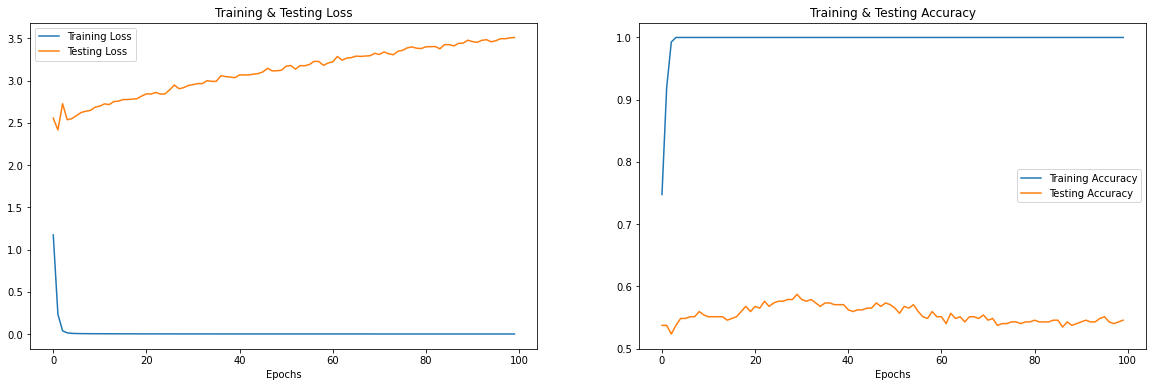

In [24]:
print("Accuracy of our model on test data : " , model_001.evaluate(x_test,y_test)[1]*100 , "%")
epochs = [i for i in range(eps)]
fig , ax = plt.subplots(1,2)
train_acc = history001.history['accuracy']
train_loss = history001.history['loss']
test_acc = history001.history['val_accuracy']
test_loss = history001.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

INFO:tensorflow:Assets written to: drive/MyDrive/Deep Learning/speech_model_CNN_001.tf/assets


In [ ]:
#np.save(os.path.join('drive/MyDrive/Deep Learning', 'x_train'), x_train)
model_001.save("drive/MyDrive/Deep Learning/speech_model_CNN_001.tf", save_format='tf')

INFO:tensorflow:Assets written to: drive/MyDrive/Deep Learning/speech_model_CNN_001.tf/assets


In [ ]:
model_002=Sequential()
model_002.add(Conv2D(32, (3,3),input_shape=(224,20,1),strides=(1,1), padding='same', activation='relu'))
model_002.add(MaxPooling2D(pool_size=(2,2)))
model_002.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model_002.add(MaxPooling2D(pool_size=(2,2)))
model_002.add(Flatten())
model_002.add(Dense(64))
model_002.add(Activation('relu'))
model_002.add(Dense(units=8, activation='softmax'))
model_002.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model_002.summary()
#Accuracy of our model on test data :  52.63158082962036 %





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 20, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 10, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 10, 32)       9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 5, 32)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 5, 32)         9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 2, 32)        0

In [ ]:
history002=model_002.fit(x_train, y_train, batch_size=64, epochs=eps, validation_data=(x_test, y_test))


Epoch 1/100
17/17 [==============================] - 6s 332ms/step - loss: 22.6731 - accuracy: 0.1377 - val_loss: 2.3426 - val_accuracy: 0.1440
Epoch 2/100
17/17 [==============================] - 5s 319ms/step - loss: 2.1071 - accuracy: 0.1433 - val_loss: 2.0829 - val_accuracy: 0.1219
Epoch 3/100
17/17 [==============================] - 7s 446ms/step - loss: 2.0437 - accuracy: 0.1691 - val_loss: 2.0592 - val_accuracy: 0.1385
Epoch 4/100
17/17 [==============================] - 5s 318ms/step - loss: 2.0212 - accuracy: 0.1867 - val_loss: 2.0324 - val_accuracy: 0.1662
Epoch 5/100
17/17 [==============================] - 5s 321ms/step - loss: 1.9718 - accuracy: 0.2486 - val_loss: 1.9840 - val_accuracy: 0.2161
Epoch 6/100
17/17 [==============================] - 5s 320ms/step - loss: 1.8504 - accuracy: 0.3050 - val_loss: 1.8245 - val_accuracy: 0.2742
Epoch 7/100
17/17 [==============================] - 6s 378ms/step - loss: 1.5875 - accuracy: 0.4325 - val_loss: 1.6338 - val_accuracy: 0.354

12/12 [==============================] - 0s 38ms/step - loss: 3.1784 - accuracy: 0.5429
Accuracy of our model on test data :  54.29362654685974 %


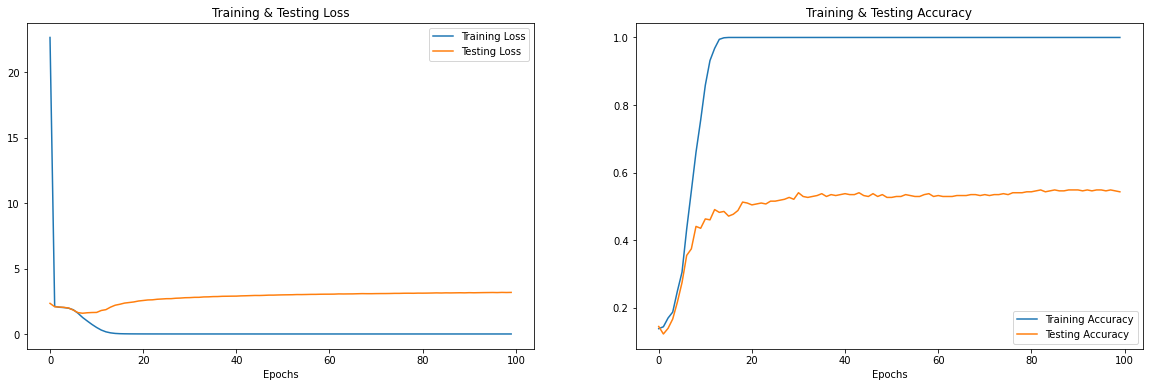

In [ ]:
print("Accuracy of our model on test data : " , model_002.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(eps)]
fig , ax = plt.subplots(1,2)
train_acc_002 = history002.history['accuracy']
train_loss_002 = history002.history['loss']
test_acc_002 = history002.history['val_accuracy']
test_loss_002 = history002.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss_002 , label = 'Training Loss')
ax[0].plot(epochs , test_loss_002 , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc_002 , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc_002 , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
model_002.save("speech_model_CNN_002.tf", save_format='tf')

INFO:tensorflow:Assets written to: speech_model_CNN_002.tf/assets


In [ ]:
model_003=Sequential()
model_003.add(Conv2D(32, (3,3),input_shape=(224,20,1),strides=(1,1), padding='same', activation='relu'))
model_003.add(MaxPooling2D(pool_size=(2,2)))
model_003.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model_003.add(MaxPooling2D(pool_size=(2,2)))
model_003.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_003.add(MaxPooling2D(pool_size=(2,2)))
model_003.add(Flatten())
model_003.add(Dense(64))
model_003.add(Activation('relu'))
model_003.add(Dense(units=8, activation='softmax'))
model_003.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model_003.summary()
#Accuracy of our model on test data :  52.63158082962036 %





Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 20, 32)       320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 10, 32)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 10, 32)       9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 56, 5, 32)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 56, 5, 64)         18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 28, 2, 64)       

In [ ]:
history003=model_003.fit(x_train, y_train, batch_size=64, epochs=60, validation_data=(x_test, y_test))


Epoch 1/60
17/17 [==============================] - 7s 388ms/step - loss: 26.4754 - accuracy: 0.1608 - val_loss: 2.9266 - val_accuracy: 0.1690
Epoch 2/60
17/17 [==============================] - 8s 501ms/step - loss: 2.2410 - accuracy: 0.1821 - val_loss: 1.9829 - val_accuracy: 0.2299
Epoch 3/60
17/17 [==============================] - 6s 379ms/step - loss: 1.9002 - accuracy: 0.2782 - val_loss: 1.7768 - val_accuracy: 0.3186
Epoch 4/60
17/17 [==============================] - 6s 381ms/step - loss: 1.6780 - accuracy: 0.3336 - val_loss: 1.7869 - val_accuracy: 0.3102
Epoch 5/60
17/17 [==============================] - 6s 379ms/step - loss: 1.6064 - accuracy: 0.3706 - val_loss: 1.6286 - val_accuracy: 0.3324
Epoch 6/60
17/17 [==============================] - 6s 380ms/step - loss: 1.5113 - accuracy: 0.4159 - val_loss: 1.6251 - val_accuracy: 0.3546
Epoch 7/60
17/17 [==============================] - 6s 377ms/step - loss: 1.4418 - accuracy: 0.4501 - val_loss: 1.6556 - val_accuracy: 0.3657
Epoch

12/12 [==============================] - 1s 50ms/step - loss: 2.2574 - accuracy: 0.6177
Accuracy of our model on test data :  61.77285313606262 %


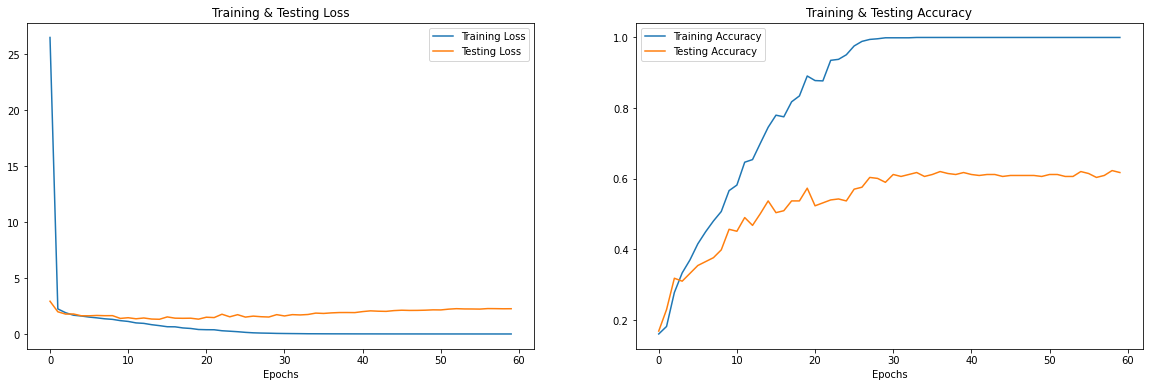

In [ ]:
eps=60
print("Accuracy of our model on test data : " , model_003.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(eps)]
fig , ax = plt.subplots(1,2)
train_acc_003 = history003.history['accuracy']
train_loss_003 = history003.history['loss']
test_acc_003 = history003.history['val_accuracy']
test_loss_003 = history003.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss_003 , label = 'Training Loss')
ax[0].plot(epochs , test_loss_003 , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc_003 , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc_003 , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
model_003.save("speech_model_CNN_003.tf", save_format='tf')

INFO:tensorflow:Assets written to: speech_model_CNN_003.tf/assets


In [ ]:
model_004=Sequential()
model_004.add(Conv2D(32, (3,3),input_shape=(224,20,1),strides=(1,1), padding='same', activation='relu'))
model_004.add(MaxPooling2D(pool_size=(2,2)))
model_004.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_004.add(MaxPooling2D(pool_size=(2,2)))
model_004.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_004.add(MaxPooling2D(pool_size=(2,2)))
model_004.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_004.add(MaxPooling2D(pool_size=(2,2)))
model_004.add(Flatten())
model_004.add(Dense(64))
model_004.add(Activation('relu'))
model_004.add(Dense(units=8, activation='softmax'))
model_004.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model_004.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 224, 20, 32)       320       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 112, 10, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 112, 10, 64)       18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 56, 5, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 56, 5, 64)         36928     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 28, 2, 64)       

In [ ]:
history004=model_004.fit(x_train, y_train, batch_size=64, epochs=60, validation_data=(x_test, y_test))


Epoch 1/60
17/17 [==============================] - 11s 555ms/step - loss: 9.6351 - accuracy: 0.1645 - val_loss: 2.2038 - val_accuracy: 0.1662
Epoch 2/60
17/17 [==============================] - 9s 548ms/step - loss: 2.0333 - accuracy: 0.2190 - val_loss: 2.0639 - val_accuracy: 0.1884
Epoch 3/60
17/17 [==============================] - 9s 547ms/step - loss: 1.9466 - accuracy: 0.2283 - val_loss: 1.8730 - val_accuracy: 0.2825
Epoch 4/60
17/17 [==============================] - 9s 546ms/step - loss: 1.8240 - accuracy: 0.2957 - val_loss: 1.8226 - val_accuracy: 0.2715
Epoch 5/60
17/17 [==============================] - 9s 548ms/step - loss: 1.7237 - accuracy: 0.3438 - val_loss: 1.7407 - val_accuracy: 0.3241
Epoch 6/60
17/17 [==============================] - 9s 547ms/step - loss: 1.6606 - accuracy: 0.3872 - val_loss: 1.7037 - val_accuracy: 0.3186
Epoch 7/60
17/17 [==============================] - 9s 544ms/step - loss: 1.5701 - accuracy: 0.4214 - val_loss: 1.7192 - val_accuracy: 0.3269
Epoch

12/12 [==============================] - 1s 68ms/step - loss: 2.2594 - accuracy: 0.6233
Accuracy of our model on test data :  62.3268723487854 %


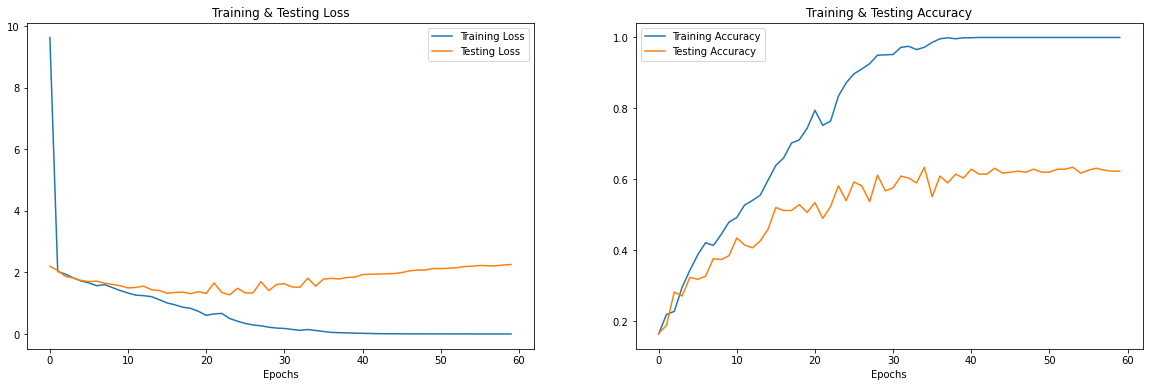

In [ ]:


print("Accuracy of our model on test data : " , model_004.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(eps)]
fig , ax = plt.subplots(1,2)
train_acc_004 = history004.history['accuracy']
train_loss_004 = history004.history['loss']
test_acc_004 = history004.history['val_accuracy']
test_loss_004 = history004.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss_004 , label = 'Training Loss')
ax[0].plot(epochs , test_loss_004 , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc_004 , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc_004 , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
model_004.save("speech_model_CNN_004.tf", save_format='tf')

INFO:tensorflow:Assets written to: speech_model_CNN_004.tf/assets


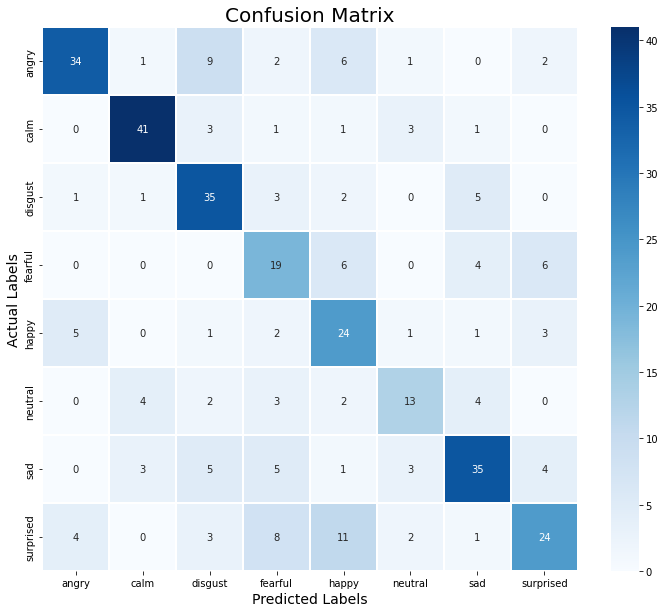

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# predicting on test data.
pred_test = model_004.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test_ = encoder.inverse_transform(y_test)
cm = confusion_matrix(y_test_, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt
from itertools import cycle


sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

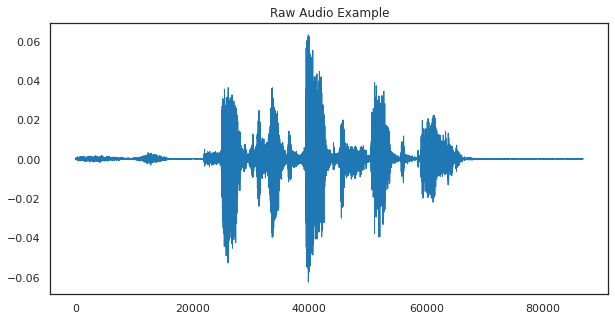

In [ ]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

In [ ]:
import librosa.display
import IPython.display as ipd
ipd.Audio(audio_files[0])

In [ ]:
result = np.array([])
zcr = np.mean(librosa.feature.zero_crossing_rate(y=y).T, axis=0)
result=np.hstack((result, zcr)) # stacking horizontally


In [ ]:
crosszr= librosa.feature.zero_crossing_rate(y=y, frame_length=512, hop_length=256 )

In [ ]:
print(crosszr)
print(crosszr.shape)

[[0.11132812 0.20898438 0.18945312 0.18359375 0.1875     0.19921875
  0.2109375  0.21484375 0.203125   0.1953125  0.1953125  0.16015625
  0.1484375  0.16796875 0.17773438 0.18945312 0.18359375 0.16210938
  0.1796875  0.20507812 0.19921875 0.20117188 0.20703125 0.21875
  0.2109375  0.20507812 0.23632812 0.23632812 0.20507812 0.19335938
  0.20703125 0.22265625 0.23828125 0.2421875  0.22070312 0.22460938
  0.25976562 0.24804688 0.25585938 0.25195312 0.24414062 0.23242188
  0.20117188 0.25195312 0.28710938 0.265625   0.26953125 0.27148438
  0.27734375 0.29101562 0.2734375  0.25390625 0.2578125  0.234375
  0.22460938 0.24804688 0.24023438 0.2265625  0.25       0.265625
  0.22851562 0.23242188 0.26171875 0.34765625 0.48046875 0.42382812
  0.4296875  0.47460938 0.3984375  0.3671875  0.34765625 0.29296875
  0.25585938 0.3515625  0.39453125 0.35546875 0.43945312 0.47460938
  0.50390625 0.45898438 0.39648438 0.44335938 0.47851562 0.4765625
  0.41796875 0.33398438 0.32421875 0.36132812 0.31835938

In [ ]:

# Chroma_stft
stft = np.abs(librosa.stft(y))
chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)

result = np.hstack((result, chroma_stft)) # stacking horizontally



In [ ]:
stft_np= librosa.stft(y,n_fft =512,hop_length =256)
chrom_= librosa.feature.chroma_stft(S=stft, sr=sr,n_fft =512,hop_length =256 )
print(chrom_.shape)
print(stft_np.shape)

(12, 170)
(257, 340)


In [ ]:
# MFCC
mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr).T, axis=0)
result = np.hstack((result, mfcc)) # stacking horizontally



In [ ]:
mfcc_np =librosa.feature.mfcc(y=y, sr=sr,n_fft =512,hop_length =256)
print(stft_np.shape)
print(librosa.feature.mfcc(y=y, sr=sr).shape)

(257, 340)
(20, 170)


In [ ]:
print(result)
print(result.shape)

[ 1.92580997e-01  7.06520081e-01  6.84076309e-01  6.31869674e-01
  6.60822511e-01  6.40430570e-01  6.22973979e-01  6.62257135e-01
  7.10856199e-01  7.36505687e-01  7.57091045e-01  6.72160208e-01
  6.42881930e-01 -6.06198120e+02  8.94327240e+01 -2.38671551e+01
  2.77159443e+01  2.44374776e+00 -2.45262408e+00 -2.30074196e+01
 -4.49538565e+00 -1.92013416e+01 -9.69154167e+00 -9.60041332e+00
 -1.10001183e+01  1.78621328e+00 -1.27328930e+01 -5.05517602e-01
 -6.31647444e+00 -2.78767800e+00 -4.14966536e+00 -2.74403930e+00
 -2.11930084e+00]
(33,)


In [ ]:
print(mfcc)
print(mfcc.shape)

[-6.0619812e+02  8.9432724e+01 -2.3867155e+01  2.7715944e+01
  2.4437478e+00 -2.4526241e+00 -2.3007420e+01 -4.4953856e+00
 -1.9201342e+01 -9.6915417e+00 -9.6004133e+00 -1.1000118e+01
  1.7862133e+00 -1.2732893e+01 -5.0551760e-01 -6.3164744e+00
 -2.7876780e+00 -4.1496654e+00 -2.7440393e+00 -2.1193008e+00]
(20,)


In [ ]:
# Root Mean Square Value
rms = np.mean(librosa.feature.rms(y=y).T, axis=0)
result = np.hstack((result, rms)) # stacking horizontally


In [ ]:
rms_np = librosa.feature.rms(y=y,frame_length =512,hop_length =256)
print(rms_np.shape)

(1, 340)


In [ ]:
print(rms)
print(rms.shape)

[0.00358211]
(1,)


In [ ]:

# MelSpectogram
mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)
result = np.hstack((result, mel)) # stacking horizontally

In [ ]:
print(mel)
print(mel.shape)

[2.95681548e-05 9.43526902e-06 2.75873008e-05 6.70363152e-05
 2.82567181e-03 1.43421395e-02 2.66836956e-02 2.13610362e-02
 1.81191396e-02 1.26073696e-02 1.47263557e-02 1.11059118e-02
 1.85076930e-02 2.17014104e-02 5.26114628e-02 9.66847613e-02
 5.55535927e-02 4.30691130e-02 2.86493916e-02 7.49233440e-02
 7.24376962e-02 1.55949816e-02 1.50701357e-02 6.85167536e-02
 4.68548574e-02 5.46111502e-02 7.86814541e-02 5.00108898e-02
 1.06560811e-02 1.58949606e-02 5.11308014e-03 2.14506499e-03
 2.02122075e-03 4.32178937e-03 6.96617272e-03 5.38739003e-03
 1.45281747e-03 1.96103170e-03 3.14254826e-03 3.26149678e-03
 5.30219497e-03 3.48059018e-03 1.21555920e-03 6.55634678e-04
 1.34611502e-03 1.08829804e-03 1.63555809e-03 1.37524365e-03
 6.36098557e-04 1.43006071e-03 4.97756002e-04 5.28900477e-04
 1.66819466e-03 1.30095065e-03 4.56532580e-04 5.31056547e-04
 7.16484094e-04 5.88704715e-04 8.80639011e-04 1.37584913e-03
 2.31871428e-03 1.26587367e-03 1.20230112e-03 2.71607633e-03
 2.65801651e-03 2.061223

In [ ]:

mel_arr = librosa.feature.melspectrogram(y=y, sr=sr,hop_length=256,n_fft=512)
#v 86817

In [ ]:
print(mel_arr.shape)
print(mel_arr)

(128, 340)
[[4.08330862e-07 8.32438189e-08 4.25038316e-08 ... 2.88099464e-08
  5.79817723e-08 2.89256596e-09]
 [8.27744771e-07 1.68747064e-07 8.61613145e-08 ... 5.84018629e-08
  1.17537297e-07 5.86364290e-09]
 [5.15477041e-07 1.25215408e-07 1.48481405e-08 ... 5.27327160e-08
  5.51763648e-08 3.42398843e-09]
 ...
 [2.37688927e-12 3.27142533e-20 1.95944107e-19 ... 5.72795271e-21
  1.98945936e-20 1.46419812e-12]
 [2.74240157e-12 3.30976515e-20 1.81291818e-19 ... 3.15718219e-21
  1.43823347e-20 1.50410402e-12]
 [2.95730671e-12 3.47899209e-20 1.77287036e-19 ... 1.75115731e-21
  1.13604097e-20 1.52069253e-12]]


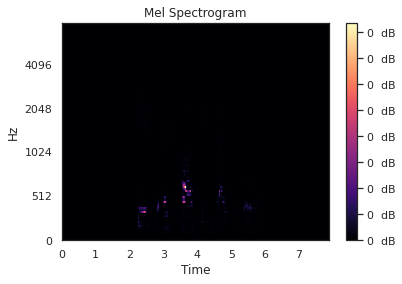

In [ ]:
import librosa.display
import matplotlib.pyplot as plt
librosa.display.specshow(mel_arr, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%-2.0f dB');

In [ ]:
print('mel_arr',mel_arr.shape)
print('rms_np',rms_np.shape)
print('mfcc_np',mfcc_np.shape)
print('chrom_',chrom_.shape)
print('stft_np',stft_np.shape)
print('crosszr',crosszr.shape)


mel_arr (128, 340)
rms_np (1, 340)
mfcc_np (20, 340)
chrom_ (12, 170)
stft_np (257, 340)
crosszr (1, 340)


In [ ]:
feat = np.array([])

zcrT = crosszr.T
feat=zcrT.copy()
#feat=np.column_stack((feat, zcrT)) # stacking horizontally


In [ ]:
mel_arr
rms_np
mfcc_np
chrom_
stft_np
crosszr

array([[0.11132812, 0.20898438, 0.18945312, 0.18359375, 0.1875    ,
        0.19921875, 0.2109375 , 0.21484375, 0.203125  , 0.1953125 ,
        0.1953125 , 0.16015625, 0.1484375 , 0.16796875, 0.17773438,
        0.18945312, 0.18359375, 0.16210938, 0.1796875 , 0.20507812,
        0.19921875, 0.20117188, 0.20703125, 0.21875   , 0.2109375 ,
        0.20507812, 0.23632812, 0.23632812, 0.20507812, 0.19335938,
        0.20703125, 0.22265625, 0.23828125, 0.2421875 , 0.22070312,
        0.22460938, 0.25976562, 0.24804688, 0.25585938, 0.25195312,
        0.24414062, 0.23242188, 0.20117188, 0.25195312, 0.28710938,
        0.265625  , 0.26953125, 0.27148438, 0.27734375, 0.29101562,
        0.2734375 , 0.25390625, 0.2578125 , 0.234375  , 0.22460938,
        0.24804688, 0.24023438, 0.2265625 , 0.25      , 0.265625  ,
        0.22851562, 0.23242188, 0.26171875, 0.34765625, 0.48046875,
        0.42382812, 0.4296875 , 0.47460938, 0.3984375 , 0.3671875 ,
        0.34765625, 0.29296875, 0.25585938, 0.35

In [ ]:
#feat = np.array([])
mel_arrT	=mel_arr.T
rms_npT		= rms_np.T
mfcc_npT	=mfcc_np.T
chrom_T		= chrom_.T
stft_npT	=stft_np.T
crosszrT	= crosszr.T


feat=np.hstack((feat, mel_arrT))
feat=np.hstack((feat, rms_npT	))
feat=np.hstack((feat, mfcc_npT))
#feat=np.hstack((feat, chrom_T	))
feat=np.hstack((feat, stft_npT))
feat=np.hstack((feat, crosszrT))



In [ ]:
print('mel_arr',mel_arrT.shape)
print('rms_np',rms_npT.shape)
print('mfcc_np',mfcc_npT.shape)
print('chrom_',chrom_T.shape)
print('stft_np',stft_npT.shape)
print('crosszr',crosszrT.shape)


mel_arr (340, 128)
rms_np (340, 1)
mfcc_np (340, 20)
chrom_ (170, 12)
stft_np (340, 257)
crosszr (340, 1)


In [ ]:
feet = pd.DataFrame(mel_arrT)

In [ ]:
feet['crosszr']=crosszrT

In [ ]:
feet.describe

<bound method NDFrame.describe of                 0             1             2             3             4  \
0    4.083309e-07  8.277448e-07  5.154770e-07  2.647342e-07  9.646325e-07   
1    8.324382e-08  1.687471e-07  1.252154e-07  6.430703e-08  6.699511e-08   
2    4.250383e-08  8.616131e-08  1.484814e-08  7.625578e-09  1.839236e-07   
3    3.322471e-07  6.735121e-07  1.646932e-07  8.458169e-08  1.446596e-07   
4    1.599983e-06  3.243394e-06  1.267649e-07  6.510282e-08  1.266071e-07   
..            ...           ...           ...           ...           ...   
335  2.180382e-08  4.419945e-08  2.136129e-08  1.097054e-08  3.523980e-07   
336  3.938071e-09  7.983029e-09  3.671919e-08  1.885792e-08  3.051851e-08   
337  2.880995e-08  5.840186e-08  5.273272e-08  2.708201e-08  9.877431e-08   
338  5.798177e-08  1.175373e-07  5.517636e-08  2.833699e-08  1.274030e-08   
339  2.892566e-09  5.863643e-09  3.423988e-09  1.758462e-09  5.068577e-08   

                5             6          

In [ ]:
#feet['mel_arr']=mel_arrT
feet['rms_np']=rms_npT
#feet['mfcc_np']=mfcc_npT
#feet['chrom_']=chrom_T
feet['stft_np']=stft_npT
#feet['crosszr']=crosszrT

ValueError: ignored

In [ ]:
print('mel_arr',mel_arrT.shape)
print('rms_np',rms_npT.shape)
print('mfcc_np',mfcc_npT.shape)
print('chrom_',chrom_T.shape)
print('stft_np',stft_npT.shape)
print('crosszr',crosszrT.shape)


mel_arr (340, 128)
rms_np (340, 1)
mfcc_np (340, 20)
chrom_ (170, 12)
stft_np (340, 257)
crosszr (340, 1)


In [ ]:

feat=np.hstack((feat, mel_arrT))

In [ ]:
feat=np.hstack((feat, rms_npT	))

In [ ]:
feat=np.hstack((feat, mfcc_npT))

In [ ]:
feat=np.hstack((feat, stft_npT))

In [ ]:
feet=pd.DataFrame(feat)

In [ ]:
feet.describe

<bound method NDFrame.describe of                     0                           1    \
0    0.111328+0.000000j  4.083309e-07+0.000000e+00j   
1    0.208984+0.000000j  8.324382e-08+0.000000e+00j   
2    0.189453+0.000000j  4.250383e-08+0.000000e+00j   
3    0.183594+0.000000j  3.322471e-07+0.000000e+00j   
4    0.187500+0.000000j  1.599983e-06+0.000000e+00j   
..                  ...                         ...   
335  0.376953+0.000000j  2.180382e-08+0.000000e+00j   
336  0.404297+0.000000j  3.938071e-09+0.000000e+00j   
337  0.373047+0.000000j  2.880995e-08+0.000000e+00j   
338  0.347656+0.000000j  5.798177e-08+0.000000e+00j   
339  0.201172+0.000000j  2.892566e-09+0.000000e+00j   

                            2                           3    \
0    8.277448e-07+0.000000e+00j  5.154770e-07+0.000000e+00j   
1    1.687471e-07+0.000000e+00j  1.252154e-07+0.000000e+00j   
2    8.616131e-08+0.000000e+00j  1.484814e-08+0.000000e+00j   
3    6.735121e-07+0.000000e+00j  1.646932e-07+0.00000

correlated_pea_db=feet.corr(method='spearman')

print(correlated_pea_db)

for i in range (correlated_pea_db.shape[0]):
    for j in range (i+1,correlated_pea_db.shape[1]) :
        if abs(correlated_pea_db.iloc[i,j])>0.80:
            print('_'*20)
            print(correlated_pea_db.index[i],correlated_pea_db.columns[j],)
            print('corelation between:',correlated_pea_db.iloc[i,j])
           # print('corelation between:',correlated_pea_db.index[i],'and class',correlated_pea_db.iloc[i,correlated_pea_db.shape[1]-1])
           # print('corelation between:',correlated_pea_db.columns[j],'and class',correlated_pea_db.iloc[j,correlated_pea_db.shape[1]-1])
